# Project 2: Supervised Learning
### Building a Student Intervention System
original data, uc irvine: https://archive.ics.uci.edu/ml/datasets/Student+Performance

## 1. Classification vs Regression

Your goal is to identify students who might need early intervention - which type of supervised machine learning problem is this, classification or regression? Why?

> This is a classifcation problem, where the goal is to make a decision with binary output (need or don't need). Classification is for solving problems with discrete value outputs.

## 2. Exploring the Data

Let's go ahead and read in the student dataset first.

_To execute a code cell, click inside it and press **Shift+Enter**._

In [1]:
# Import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

/Users/jjl/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"
# Note: The last column 'passed' is the target/label, all other are feature columns

Student data read successfully!


Now, can you find out the following facts about the dataset?
- Total number of students
- Number of students who passed
- Number of students who failed
- Graduation rate of the class (%)
- Number of features

_Use the code block below to compute these values. Instructions/steps are marked using **TODO**s._

In [45]:
# TODO: Compute desired values - replace each '?' with an appropriate expression/function call
n_students = len(student_data)
n_features = len(student_data.columns)
n_passed = len(student_data[student_data.passed == 'yes'])
n_failed = len(student_data[student_data.passed == 'no'])
grad_rate = (float(n_passed)/n_students)*100
print "Total number of students: {}".format(n_students)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Number of features: {}".format(n_features)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of students who passed: 265
Number of students who failed: 130
Number of features: 31
Graduation rate of the class: 67.09%


In [14]:
## show unique str values, numerical range

def show_values(x):
    print "dataset shape: {} x {}\n".format(x.shape[0], x.shape[1])
    for col in list(x.columns):
        if type(x[col].iloc[0]) == str:
            print "{}: {}".format(col, x[col].unique())
        else:
            print "{}: {} - {}".format(col, x[col].min(), x[col].max())

In [16]:
print show_values(student_data)

dataset shape: 395 x 31

school: ['GP' 'MS']
sex: ['F' 'M']
age: 15 - 22
address: ['U' 'R']
famsize: ['GT3' 'LE3']
Pstatus: ['A' 'T']
Medu: 0 - 4
Fedu: 0 - 4
Mjob: ['at_home' 'health' 'other' 'services' 'teacher']
Fjob: ['teacher' 'other' 'services' 'health' 'at_home']
reason: ['course' 'other' 'home' 'reputation']
guardian: ['mother' 'father' 'other']
traveltime: 1 - 4
studytime: 1 - 4
failures: 0 - 3
schoolsup: ['yes' 'no']
famsup: ['no' 'yes']
paid: ['no' 'yes']
activities: ['no' 'yes']
nursery: ['yes' 'no']
higher: ['yes' 'no']
internet: ['no' 'yes']
romantic: ['no' 'yes']
famrel: 1 - 5
freetime: 1 - 5
goout: 1 - 5
Dalc: 1 - 5
Walc: 1 - 5
health: 1 - 5
absences: 0 - 75
passed: ['no' 'yes']
None


In [4]:
student_data[:4]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes


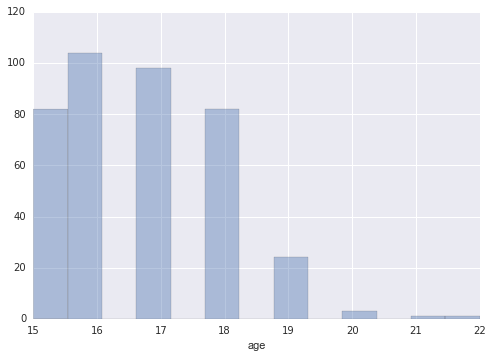

In [13]:
sns.distplot(student_data['age'], kde=False)

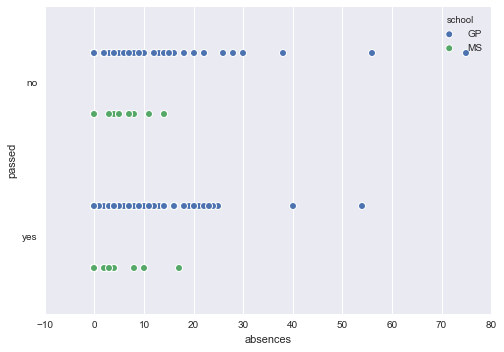

In [31]:
sns.stripplot(x="absences", y="passed", hue="school", data=student_data);

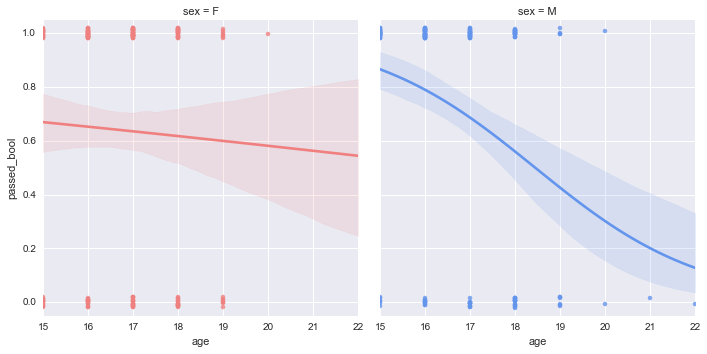

In [21]:
# Make a custom palette with gendered colors
pal = dict(M="#6495ED", F="#F08080")

# convert 'passed' label to boolean
student_data['passed_bool'] = student_data['passed'].replace(['yes', 'no'], [1, 0])

# Show the passed label as a function of age and sex
g = sns.lmplot(x="age", y="passed_bool", col="sex", hue="sex", data=student_data,
               palette=pal, y_jitter=.02, logistic=True)
g.set(xlim=(15, 22), ylim=(-.05, 1.05))

---
## 3. Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Let's first separate our data into feature and target columns, and see if any features are non-numeric.<br/>
**Note**: For this dataset, the last column (`'passed'`) is the target or label we are trying to predict.

In [3]:
# Extract feature (X) and target (y) columns
feature_cols = list(student_data.columns[:-1])  # all columns but last are features
target_col = student_data.columns[-1]  # last column is the target/label
print "Feature column(s):-\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

X_all = student_data[feature_cols]  # feature values for all students
y_all = student_data[target_col]  # corresponding targets/labels
print "\nFeature values:-"
print X_all.head(3)  # print the first few rows

Feature column(s):-
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:-
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob     Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home  teacher   
1     GP   F   17       U     GT3       T     1     1  at_home    other   
2     GP   F   15       U     LE3       T     1     1  at_home    other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       yes      yes        no       5         3     3    1    1      3   
2   ...       yes      yes        no       4         3     2    2    3      3   

  a

### Preprocess feature columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation.

In [4]:
# Preprocess feature columns
def preprocess_features(X):
    outX = pd.DataFrame(index=X.index)  # output dataframe, initially empty

    # Check each column
    for col, col_data in X.iteritems():
        # If data type is non-numeric, try to replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])
            # Note: This should change the data type for yes/no columns to int

        # If still non-numeric, convert to one or more dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix=col)  # e.g. 'school' => 'school_GP', 'school_MS'

        outX = outX.join(col_data)  # collect column(s) in output dataframe

    return outX

X_all = preprocess_features(X_all)
print "Processed feature columns ({}):-\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48):-
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Split data into training and test sets

So far, we have converted all _categorical_ features into numeric values. In this next step, we split the data (both features and corresponding labels) into training and test sets.

In [300]:
from sklearn import cross_validation

# First, decide how many training vs test samples you want
num_all = student_data.shape[0]  # same as len(student_data)
num_train = 300  # about 75% of the data
num_test = num_all - num_train

# TODO: Then, select features (X) and corresponding labels (y) for the training and test sets
# Note: Shuffle the data or randomly select samples to avoid any bias due to ordering in the dataset
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X_all, y_all, \
                                                                     test_size=int(num_test), random_state=0)
#X_train = ?
#y_train = ?
#X_test = ?
#y_test = ?
print "Training set: {} samples".format(X_train.shape[0])
print "Test set: {} samples".format(X_test.shape[0])

# Note: If you need a validation set, extract it from within training data

Training set: 300 samples
Test set: 95 samples


---
## 4. Training and Evaluating Models
Choose 3 supervised learning models that are available in scikit-learn, and appropriate for this problem. For each model:

- What is the theoretical O(n) time & space complexity in terms of input size?
- What are the general applications of this model? What are its strengths and weaknesses?
- Given what you know about the data so far, why did you choose this model to apply?
- Fit this model to the training data, try to predict labels (for both training and test sets), and measure the F<sub>1</sub> score. Repeat this process with different training set sizes (100, 200, 300), keeping test set constant.

Produce a table showing training time, prediction time, F<sub>1</sub> score on training set and F<sub>1</sub> score on test set, for each training set size.

Note: You need to produce 3 such tables - one for each model.

In [6]:
'''
Define various functions to utilize for each new model
'''

# show model training time
import time

def train_classifier(clf, X_train, y_train):
    print "Training {}...".format(clf.__class__.__name__)
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    print "Done!\nTraining time (secs): {:.3f}".format(end - start)


# Train and predict using different training set sizes
def train_predict(clf, X_train, y_train, X_test, y_test):
    print "------------------------------------------"
    print "Training set size: {}".format(len(X_train))
    train_classifier(clf, X_train, y_train)
    print "F1 score for training set: {}".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {}".format(predict_labels(clf, X_test, y_test))


# Run the helper function above for desired subsets of training data
# Note: Keep the test set constant
def train_predict_size(clf, size):
    subsets = np.linspace(len(X_train)/size, len(X_train), size, dtype=int)
    for i,s in enumerate(subsets):
        train_predict(clf, X_train[:s], y_train[:s], X_test, y_test)


# Predict on training set and compute F1 score`
from sklearn.metrics import f1_score

def predict_labels(clf, features, target):
    print "Predicting labels using {}...".format(clf.__class__.__name__)
    start = time.time()
    y_pred = clf.predict(features)
    end = time.time()
    print "Done!\nPrediction time (secs): {:.3f}".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')


# Predict on training set and compute F1 score
def show_f1_score(clf, X_set, y_set, dataset):
    score = predict_labels(clf, X_set, y_set)
    print "F1 score for {} set: {}".format(dataset, score)

### Model #1: [Decision Tree](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

- What is the theoretical O(n) time & space complexity in terms of input size?
>  O(n samples * n features * log n samples)

- What are the general applications of this model? What are its strengths and weaknesses?
> Classification via information gain.

    > Prefers good splits near top of tree. Overfitting.

- Given what you know about the data so far, why did you choose this model to apply?
> Many features



| Decision Tree                  | Training set size 100   |Training set size 200|Training set size 300|
| --------------------------|:-----:|:-----:|:-----:|
| Training time (secs)      |0.023  |0.001  |0.002  |
| Prediction time (secs)    |0.001  |0.000  |0.002  |
| F1 score for training set |0.8504 |0.8425 |0.8622 |
| F1 score for test set     |0.7586 |0.7971 |0.8088 |

In [45]:
# Train a model
import time

def train_classifier(clf, X_train, y_train):
    print "Training {}...".format(clf.__class__.__name__)
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    print "Done!\nTraining time (secs): {:.3f}".format(end - start)

# TODO: Choose a model, import it and instantiate an object
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

# Fit model to training data
train_classifier(clf, X_train, y_train)  # note: using entire training set here
#print clf  # you can inspect the learned model by printing it

Training DecisionTreeClassifier...
Done!
Training time (secs): 0.002


In [11]:
# Train and predict using different training set sizes
def train_predict(clf, X_train, y_train, X_test, y_test):
    print "------------------------------------------"
    print "Training set size: {}".format(len(X_train))
    train_classifier(clf, X_train, y_train)
    print "F1 score for training set: {}".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {}".format(predict_labels(clf, X_test, y_test))

# TODO: Run the helper function above for desired subsets of training datoa
# Note: Keep the test set constant
subsets = np.linspace(len(X_train)/3, len(X_train), 3, dtype=int)
for i,s in enumerate(subsets):
    train_predict(clf, X_train[:s], y_train[:s], X_test, y_test)

------------------------------------------
Training set size: 100
Training DecisionTreeClassifier...
Done!
Training time (secs): 0.023
Predicting labels using DecisionTreeClassifier...
Done!
Prediction time (secs): 0.001
F1 score for training set: 0.850393700787
Predicting labels using DecisionTreeClassifier...
Done!
Prediction time (secs): 0.000
F1 score for test set: 0.758620689655
------------------------------------------
Training set size: 200
Training DecisionTreeClassifier...
Done!
Training time (secs): 0.001
Predicting labels using DecisionTreeClassifier...
Done!
Prediction time (secs): 0.000
F1 score for training set: 0.842465753425
Predicting labels using DecisionTreeClassifier...
Done!
Prediction time (secs): 0.000
F1 score for test set: 0.797101449275
------------------------------------------
Training set size: 300
Training DecisionTreeClassifier...
Done!
Training time (secs): 0.002
Predicting labels using DecisionTreeClassifier...
Done!
Prediction time (secs): 0.002
F1 sc

In [230]:
# Predict on training set and compute F1 score
from sklearn.metrics import f1_score

def predict_labels(clf, features, target):
    print "Predicting labels using {}...".format(clf.__class__.__name__)
    start = time.time()
    y_pred = clf.predict(features)
    end = time.time()
    print "Done!\nPrediction time (secs): {:.3f}".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')

train_f1_score = predict_labels(clf, X_train, y_train)
print "F1 score for training set: {}".format(train_f1_score)

Predicting labels using DecisionTreeClassifier...
Done!
Prediction time (secs): 0.009
F1 score for training set: 1.0


In [33]:
# Predict on test data
print "F1 score for test set: {}".format(predict_labels(clf, X_test, y_test))

Predicting labels using DecisionTreeClassifier...
Done!
Prediction time (secs): 0.000
F1 score for test set: 0.716666666667


#### Decision Tree: adjust min_samples_split

In [46]:
# Decision tree with varying min_samples_split
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(min_samples_split=30, random_state=0)

# Fit model to training data
train_classifier(clf, X_train, y_train)  # note: using entire training set here
#print clf  # you can inspect the learned model by printing it

# Predict on training set and compute F1 score
train_f1_score = predict_labels(clf, X_train, y_train)
print "F1 score for training set: {}".format(train_f1_score)

# Predict on test data
print "F1 score for test set: {}".format(predict_labels(clf, X_test, y_test))

Training DecisionTreeClassifier...
Done!
Training time (secs): 0.002
Predicting labels using DecisionTreeClassifier...
Done!
Prediction time (secs): 0.000
F1 score for training set: 0.85308056872
Predicting labels using DecisionTreeClassifier...
Done!
Prediction time (secs): 0.000
F1 score for test set: 0.740157480315


#### Decision Tree: adjust criterion

In [47]:
# Decision tree with varying criterion
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=30, random_state=0)

# Fit model to training data
train_classifier(clf, X_train, y_train)  # note: using entire training set here
#print clf  # you can inspect the learned model by printing it

# Predict on training set and compute F1 score
train_f1_score = predict_labels(clf, X_train, y_train)
print "F1 score for training set: {}".format(train_f1_score)

# Predict on test data
print ""
print "F1 score for test set: {}".format(predict_labels(clf, X_test, y_test))

Training DecisionTreeClassifier...
Done!
Training time (secs): 0.002
Predicting labels using DecisionTreeClassifier...
Done!
Prediction time (secs): 0.000
F1 score for training set: 0.862222222222

Predicting labels using DecisionTreeClassifier...
Done!
Prediction time (secs): 0.000
F1 score for test set: 0.808823529412


#### Decision Tree: visualization

In [90]:
# Train a classifier
clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=100, class_weight='balanced', random_state=0)

train_classifier(clf, X_train, y_train)
print ""
show_f1_score(clf, X_train, y_train, 'training')
print ""
show_f1_score(clf, X_test, y_test, 'test')

Training DecisionTreeClassifier...
Done!
Training time (secs): 0.021

Predicting labels using DecisionTreeClassifier...
Done!
Prediction time (secs): 0.000
F1 score for training set: 0.769633507853

Predicting labels using DecisionTreeClassifier...
Done!
Prediction time (secs): 0.000
F1 score for test set: 0.71186440678

Accuracy for test: 0.642105263158

Precision for test ('no'): 0.527777777778

Precision for test ('yes'): 0.71186440678

Recall for test ('no'): 0.527777777778

Recall for test ('yes'): 0.71186440678



In [ ]:
# Look at other metrics: accuracy, precision, recall
y_pred = clf.predict(X_test)
print "Accuracy for test: {}\n".format(metrics.accuracy_score(y_test, y_pred))
print "Precision for test ('no'): {}\n".format(metrics.precision_score(y_test, y_pred, pos_label="no"))
print "Precision for test ('yes'): {}\n".format(metrics.precision_score(y_test, y_pred, pos_label="yes"))
print "Recall for test ('no'): {}\n".format(metrics.recall_score(y_test, y_pred, pos_label="no"))
print "Recall for test ('yes'): {}\n".format(metrics.recall_score(y_test, y_pred, pos_label="yes"))

In [65]:
# export the tree in Graphviz format
# http://scikit-learn.org/stable/modules/tree.html#tree

from sklearn.externals.six import StringIO
with open("student_data.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f, feature_names=list(X_train.columns))

In [66]:
# use Graphviz’s dot tool to create PDF (or any other supported file type): dot -Tpdf iris.dot -o iris.pdf
import os
os.unlink('student_data.dot')

In [9]:
# export tree as pdf using pydot
from sklearn import tree
from sklearn.externals.six import StringIO  
import pydot 
import dot_parser
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph.write_pdf("student_data_dt.pdf")

Dec 20 08:52:40 jjls-MacBook-Pro.local dot[7892] <Error>: The function ‘CGFontGetGlyphPath’ is obsolete and will be removed in an upcoming update. Unfortunately, this application, or a library it uses, is using this obsolete function, and is thereby contributing to an overall degradation of system performance.
Dec 20 08:52:40 jjls-MacBook-Pro.local dot[7892] <Error>: The function ‘CGFontGetGlyphPaths’ is obsolete and will be removed in an upcoming update. Unfortunately, this application, or a library it uses, is using this obsolete function, and is thereby contributing to an overall degradation of system performance.



True

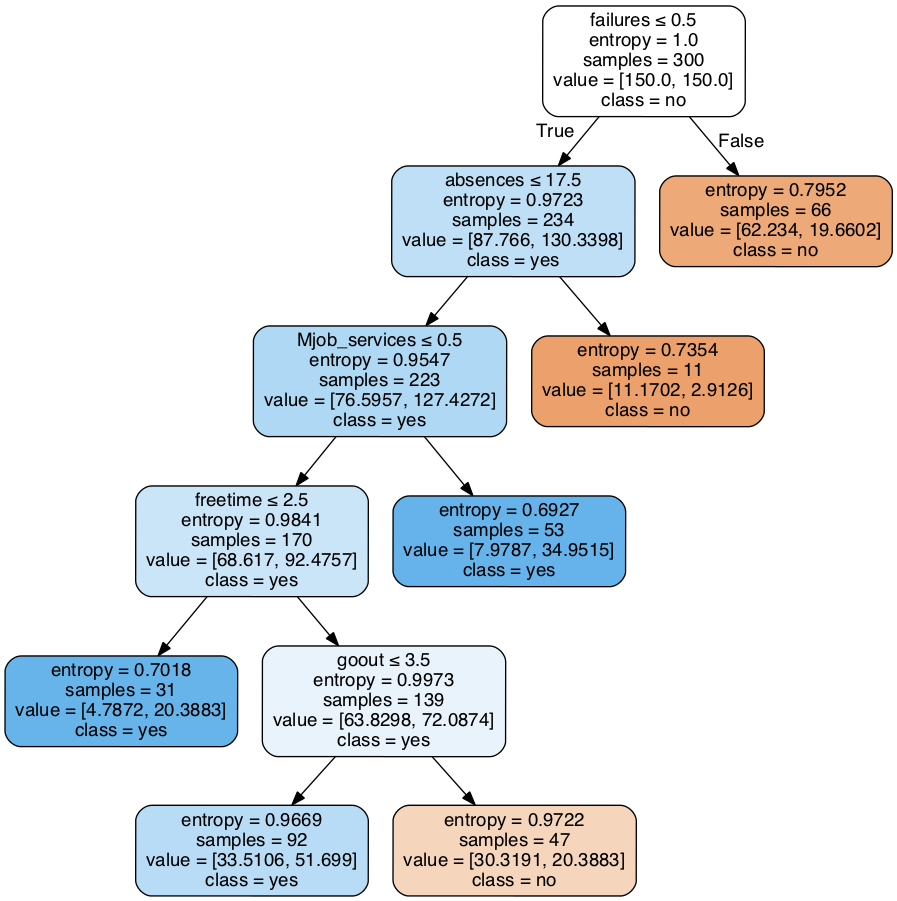

In [91]:
# visualize decision tree plot inline
from sklearn import tree
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydot
import dot_parser

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,feature_names=list(X_train.columns), 
                     class_names=list(y_train.unique()),filled=True, rounded=True, special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


---
### Model #2: [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

- What is the theoretical O(n) time & space complexity in terms of input size?
> O(n samples * n features * log n samples)

- What are the general applications of this model? What are its strengths and weaknesses?
> Classification via information gain.

    > Prefers good splits near top of tree. Overfitting.

- Given what you know about the data so far, why did you choose this model to apply?
> Many features


| Random Forest             | Training set size 100|Training set size 200|Training set size 300|
| --------------------------|:-----:|:-----:|:-----:|
| Training time (secs)      |0.020  |0.017  |0.023  |
| Prediction time (secs)    |0.001  |0.001  |0.002  |
| F1 score for training set |0.9197 |0.8997 |0.8662 |
| F1 score for test set     |0.7704 |0.7972 |0.7862 |

In [46]:
# TODO: Choose a model, import it and instantiate an object
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=5, random_state=0)

# Fit model to training data
train_classifier(rf, X_train, y_train)  # note: using entire training set here
#print clf  # you can inspect the learned model by printing it

Training RandomForestClassifier...
Done!
Training time (secs): 0.033


In [47]:
# TODO: Run the helper function above for desired subsets of training data
# Note: Keep the test set constant
train_predict_size(rf, 3)


------------------------------------------
Training set size: 100
Training RandomForestClassifier...
Done!
Training time (secs): 0.020
Predicting labels using RandomForestClassifier...
Done!
Prediction time (secs): 0.001
F1 score for training set: 0.919708029197
Predicting labels using RandomForestClassifier...
Done!
Prediction time (secs): 0.001
F1 score for test set: 0.77037037037
------------------------------------------
Training set size: 200
Training RandomForestClassifier...
Done!
Training time (secs): 0.017
Predicting labels using RandomForestClassifier...
Done!
Prediction time (secs): 0.001
F1 score for training set: 0.899653979239
Predicting labels using RandomForestClassifier...
Done!
Prediction time (secs): 0.001
F1 score for test set: 0.797202797203
------------------------------------------
Training set size: 300
Training RandomForestClassifier...
Done!
Training time (secs): 0.023
Predicting labels using RandomForestClassifier...
Done!
Prediction time (secs): 0.002
F1 sco

In [48]:
# Predict on training set and compute F1 score
show_f1_score(rf, X_train, y_train, 'training')


Predicting labels using RandomForestClassifier...
Done!
Prediction time (secs): 0.002
F1 score for training set: 0.866242038217


In [49]:
# Predict on test data
show_f1_score(rf, X_test, y_test, 'test')


Predicting labels using RandomForestClassifier...
Done!
Prediction time (secs): 0.001
F1 score for test set: 0.786206896552


#### Random Forest: adjust min_samples_split

In [41]:
# Random Forest with varying min_samples_split
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=5, min_samples_split=6, random_state=0)

# Fit model to training data
train_classifier(rf, X_train, y_train)  # note: using entire training set here
#print clf  # you can inspect the learned model by printing it

# Predict on training set and compute F1 score
train_f1_score = predict_labels(rf, X_train, y_train)
print "F1 score for training set: {}".format(train_f1_score)

# Predict on test data
print "F1 score for test set: {}".format(predict_labels(rf, X_test, y_test))

Training RandomForestClassifier...
Done!
Training time (secs): 0.043
Predicting labels using RandomForestClassifier...
Done!
Prediction time (secs): 0.002
F1 score for training set: 0.857749469214
Predicting labels using RandomForestClassifier...
Done!
Prediction time (secs): 0.001
F1 score for test set: 0.786206896552


### Model #2a: Random Forest with normalized feature data

#### normalize data

In [458]:
# function to normalize non-binary data to 0-1 range

def norm_ptp(dataset, baseline=X_train):
    out_norm = pd.DataFrame(index=dataset.index)  # output dataframe, initially empty
    for col, col_data in dataset.iteritems():
        out_norm = out_norm.join(col_data)  # collect column(s) in output dataframe
    
    # normalize data in out_norm
    for col in out_norm.columns:
        if (col == 'Medu') or (col =='Fedu'):
            out_norm[col] = out_norm[col] / 4
        elif np.ptp(out_norm[col]) != 1:
            out_norm[col] = np.minimum((out_norm[col] - min(baseline[col])) / np.ptp(baseline[col]), 1.0)

    return out_norm

In [459]:
X_train_norm = norm_ptp(X_train)
X_test_norm = norm_ptp(X_test)

In [460]:
print min(X_train['age']), "-", max(X_train['age'])
print min(X_test['age']), "-", max(X_test['age'])
print ""
print min(X_train_norm['age']), "-", max(X_train_norm['age'])
print min(X_test_norm['age']), "-", max(X_test_norm['age'])


15 - 22
15 - 20

0.0 - 1.0
0.0 - 0.714285714286


In [461]:
print min(X_train['absences']), "-", max(X_train['absences'])
print min(X_test['absences']), "-", max(X_test['absences'])
print ""
print min(X_train_norm['absences']), "-", max(X_train_norm['absences'])
print min(X_test_norm['absences']), "-", max(X_test_norm['absences'])


0 - 56
0 - 75

0.0 - 1.0
0.0 - 1.0


#### fit random forest model and predict

In [212]:
# TODO: Choose a model, import it and instantiate an object
from sklearn.ensemble import RandomForestClassifier
rf_norm = RandomForestClassifier(max_depth=5)

# Fit model to training data
train_classifier(rf_norm, X_train_norm, y_train)  # note: using entire training set here
#print clf  # you can inspect the learned model by printing it

Training RandomForestClassifier...
Done!
Training time (secs): 0.035


In [213]:
# Predict on training set and compute F1 score
show_f1_score(rf_norm, X_train_norm, y_train, 'training')


Predicting labels using RandomForestClassifier...
Done!
Prediction time (secs): 0.002
F1 score for training set: 0.868644067797


In [214]:
# Predict on test data
show_f1_score(rf_norm, X_test_norm, y_test, 'test')


Predicting labels using RandomForestClassifier...
Done!
Prediction time (secs): 0.003
F1 score for test set: 0.772413793103


---
### Model #3: [SVM (Support Vector Machine)](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

- What is the theoretical O(n) time & space complexity in terms of input size?
> O(n features * n^3 samples)

- What are the general applications of this model? What are its strengths and weaknesses?
> Classification via margin maximization.

- Given what you know about the data so far, why did you choose this model to apply?
> Many features


| SVM                       | Training set size 100|Training set size 200|Training set size 300|
| --------------------------|:-----:|:-----:|:-----:|
| Training time (secs)      |0.004  |0.005  |0.011  |
| Prediction time (secs)    |0.002  |0.003  |0.006  |
| F1 score for training set |0.8591 |0.8693 |0.8692 |
| F1 score for test set     |0.7838 |0.7755 |0.7586 |

In [93]:
# TODO: Choose a model, import it and instantiate an object
from sklearn import svm
clf_svm = svm.SVC(random_state=0)

# Fit model to training data
train_classifier(clf_svm, X_train, y_train)  # note: using entire training set here
#print clf  # you can inspect the learned model by printing it

print "\n", clf_svm

Training SVC...
Done!
Training time (secs): 0.032

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)


In [94]:
# TODO: Run the helper function above for desired subsets of training data
# Note: Keep the test set constant
train_predict_size(clf_svm, 3)


------------------------------------------
Training set size: 100
Training SVC...
Done!
Training time (secs): 0.004
Predicting labels using SVC...
Done!
Prediction time (secs): 0.002
F1 score for training set: 0.859060402685
Predicting labels using SVC...
Done!
Prediction time (secs): 0.001
F1 score for test set: 0.783783783784
------------------------------------------
Training set size: 200
Training SVC...
Done!
Training time (secs): 0.005
Predicting labels using SVC...
Done!
Prediction time (secs): 0.003
F1 score for training set: 0.869281045752
Predicting labels using SVC...
Done!
Prediction time (secs): 0.002
F1 score for test set: 0.775510204082
------------------------------------------
Training set size: 300
Training SVC...
Done!
Training time (secs): 0.011
Predicting labels using SVC...
Done!
Prediction time (secs): 0.006
F1 score for training set: 0.869198312236
Predicting labels using SVC...
Done!
Prediction time (secs): 0.002
F1 score for test set: 0.758620689655


In [8]:
# Predict on training set and compute F1 score
show_f1_score(clf_svm, X_train, y_train, 'training')


Predicting labels using SVC...
Done!
Prediction time (secs): 0.006
F1 score for training set: 0.869198312236


In [9]:
# Predict on test data
show_f1_score(clf_svm, X_test, y_test, 'test')


Predicting labels using SVC...
Done!
Prediction time (secs): 0.002
F1 score for test set: 0.758620689655


### Model #3a: SVM with normalized feature data

In [221]:
# TODO: Choose a model, import it and instantiate an object
clf_svm_norm = svm.SVC()

# Fit model to training data
train_classifier(clf_svm_norm, X_train_norm, y_train)  # note: using entire training set here
#print clf  # you can inspect the learned model by printing it

Training SVC...
Done!
Training time (secs): 0.007


In [ ]:
# TODO: Run the helper function above for desired subsets of training data
# Note: Keep the test set constant
train_predict_size(clf_svm, 3)

In [222]:
# Predict on training set and compute F1 score
show_f1_score(clf_svm_norm, X_train_norm, y_train, 'training')


Predicting labels using SVC...
Done!
Prediction time (secs): 0.006
F1 score for training set: 0.814229249012


In [223]:
# Predict on test data
show_f1_score(clf_svm_norm, X_test_norm, y_test, 'test')


Predicting labels using SVC...
Done!
Prediction time (secs): 0.002
F1 score for test set: 0.766233766234


---
### Model #4: [Nearest Neighbor](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

- What is the theoretical O(n) time & space complexity in terms of input size?
> O(n features * log n samples)

- What are the general applications of this model? What are its strengths and weaknesses?
> Classification via lazy learner.

    > All features considered equally.

- Given what you know about the data so far, why did you choose this model to apply?
> Many features



| KNN                       | Training set size 100|Training set size 200|Training set size 300|
| --------------------------|:-----:|:-----:|:-----:|
| Training time (secs)      |0.001  |0.001  |0.001  |
| Prediction time (secs)    |0.023  |0.003  |0.008  |
| F1 score for training set |0.7972 |0.8571 |0.8722 |
| F1 score for test set     |0.7068 |0.7121 |0.7482 |

In [95]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier()

# Fit model to training data
train_classifier(clf_knn, X_train, y_train)  # note: using entire training set here
print clf_knn  # you can inspect the learned model by printing it

Training KNeighborsClassifier...
Done!
Training time (secs): 0.004
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


In [96]:
# TODO: Run the helper function above for desired subsets of training data
# Note: Keep the test set constant
train_predict_size(clf_knn, 3)


------------------------------------------
Training set size: 100
Training KNeighborsClassifier...
Done!
Training time (secs): 0.001
Predicting labels using KNeighborsClassifier...
Done!
Prediction time (secs): 0.023
F1 score for training set: 0.797202797203
Predicting labels using KNeighborsClassifier...
Done!
Prediction time (secs): 0.001
F1 score for test set: 0.706766917293
------------------------------------------
Training set size: 200
Training KNeighborsClassifier...
Done!
Training time (secs): 0.001
Predicting labels using KNeighborsClassifier...
Done!
Prediction time (secs): 0.003
F1 score for training set: 0.857142857143
Predicting labels using KNeighborsClassifier...
Done!
Prediction time (secs): 0.002
F1 score for test set: 0.712121212121
------------------------------------------
Training set size: 300
Training KNeighborsClassifier...
Done!
Training time (secs): 0.001
Predicting labels using KNeighborsClassifier...
Done!
Prediction time (secs): 0.008
F1 score for training

In [31]:
# Predict on training set and compute F1 score
show_f1_score(clf_knn, X_train, y_train, 'training')


Predicting labels using KNeighborsClassifier...
Done!
Prediction time (secs): 0.016
F1 score for training set: 0.872246696035


In [32]:
# Predict on test data
show_f1_score(clf_knn, X_test, y_test, 'test')


Predicting labels using KNeighborsClassifier...
Done!
Prediction time (secs): 0.003
F1 score for test set: 0.748201438849


---
### Model #5: [Naive Bayes](http://scikit-learn.org/stable/modules/naive_bayes.html)

- What is the theoretical O(n) time & space complexity in terms of input size?
> O(n)

- What are the general applications of this model? What are its strengths and weaknesses?
> Classification via maximum likelihood.

- Given what you know about the data so far, why did you choose this model to apply?
> Many features

In [108]:
# Naive Bayes
from  sklearn.naive_bayes import BernoulliNB, MultinomialNB
# nb = BernoulliNB()
passed_prior = np.array([.33, .67])  # .33 no, .67 yes
nb = MultinomialNB()

# Fit model to training data
train_classifier(nb, X_train, y_train)  # note: using entire training set here
print nb, "\n"

# Predict on training set and compute F1 score
train_f1_score = predict_labels(nb, X_train, y_train)
print "F1 score for training set: {}".format(train_f1_score)

# Predict on test data
print ""
print "F1 score for test set: {}".format(predict_labels(nb, X_test, y_test))

Training MultinomialNB...
Done!
Training time (secs): 0.003
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) 

Predicting labels using MultinomialNB...
Done!
Prediction time (secs): 0.000
F1 score for training set: 0.785046728972

Predicting labels using MultinomialNB...
Done!
Prediction time (secs): 0.000
F1 score for test set: 0.776978417266


In [109]:
# Look at other metrics: accuracy, precision, recall

y_pred = nb.predict(X_test)
print "Accuracy for test: {}\n".format(metrics.accuracy_score(y_test, y_pred))
print "Precision for test ('no'): {}\n".format(metrics.precision_score(y_test, y_pred, pos_label="no"))
print "Precision for test ('yes'): {}\n".format(metrics.precision_score(y_test, y_pred, pos_label="yes"))
print "Recall for test ('no'): {}\n".format(metrics.recall_score(y_test, y_pred, pos_label="no"))
print "Recall for test ('yes'): {}\n".format(metrics.recall_score(y_test, y_pred, pos_label="yes"))

Accuracy for test: 0.673684210526

Precision for test ('no'): 0.666666666667

Precision for test ('yes'): 0.675

Recall for test ('no'): 0.277777777778

Recall for test ('yes'): 0.915254237288



---
### Model #6: [Logistic Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

- What is the theoretical O(n) time & space complexity in terms of input size?
> O(n)

- What are the general applications of this model? What are its strengths and weaknesses?
> Classification via optimization.

    > Underfitting.

- Given what you know about the data so far, why did you choose this model to apply?
> Many features


| Logistic regression       | Training set size 100|Training set size 200|Training set size 300|
| --------------------------|:-----:|:-----:|:-----:|
| Training time (secs)      |0.002  |0.002  |0.005  |
| Prediction time (secs)    |0.000  |0.000  |0.000  |
| F1 score for training set |0.8571 |0.8380 |0.8381 |
| F1 score for test set     |0.7612 |0.7794 |0.7910 |

In [469]:
# Logistic regression model
from  sklearn import linear_model
clf = linear_model.LogisticRegression(random_state=0)

# Fit model to training data
train_classifier(clf, X_train, y_train)  # note: using entire training set here
print clf, "\n"

# Predict on training set and compute F1 score
train_f1_score = predict_labels(clf, X_train, y_train)
print "F1 score for training set: {}".format(train_f1_score)

# Predict on test data
print "F1 score for test set: {}".format(predict_labels(clf, X_test, y_test))

Training LogisticRegression...
Done!
Training time (secs): 0.005
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) 

Predicting labels using LogisticRegression...
Done!
Prediction time (secs): 0.000
F1 score for training set: 0.838137472284
Predicting labels using LogisticRegression...
Done!
Prediction time (secs): 0.000
F1 score for test set: 0.791044776119


In [99]:
# TODO: Run the helper function above for desired subsets of training data
# Note: Keep the test set constant
train_predict_size(clf, 3)


------------------------------------------
Training set size: 100
Training LogisticRegression...
Done!
Training time (secs): 0.002
Predicting labels using LogisticRegression...
Done!
Prediction time (secs): 0.000
F1 score for training set: 0.857142857143
Predicting labels using LogisticRegression...
Done!
Prediction time (secs): 0.000
F1 score for test set: 0.761194029851
------------------------------------------
Training set size: 200
Training LogisticRegression...
Done!
Training time (secs): 0.002
Predicting labels using LogisticRegression...
Done!
Prediction time (secs): 0.000
F1 score for training set: 0.838028169014
Predicting labels using LogisticRegression...
Done!
Prediction time (secs): 0.000
F1 score for test set: 0.779411764706
------------------------------------------
Training set size: 300
Training LogisticRegression...
Done!
Training time (secs): 0.005
Predicting labels using LogisticRegression...
Done!
Prediction time (secs): 0.000
F1 score for training set: 0.83813747

In [470]:
# Look at other metrics
prediction_metrics(clf, X_train, X_test, y_train, y_test)

Predicting labels using LogisticRegression...
Done!
Prediction time (secs): 0.001
F1 score for training set: 0.838137472284
Classification report (train):
             precision    recall  f1-score   support

         no       0.69      0.40      0.51        94
        yes       0.77      0.92      0.84       206

avg / total       0.75      0.76      0.74       300

Predicting labels using LogisticRegression...
Done!
Prediction time (secs): 0.000
F1 score for test set: 0.791044776119
Classification report (test):
             precision    recall  f1-score   support

         no       0.70      0.39      0.50        36
        yes       0.71      0.90      0.79        59

avg / total       0.70      0.71      0.68        95



In [479]:
# print "coefficient(s): {}".format(clf.coef_)
# print "intercept: {}".format(clf.intercept_)

print "Training set stats:"
print "Mean accuracy: {}".format(clf.score(X_train, y_train))

print "\nTest set stats:"
print "Mean accuracy: {}".format(clf.score(X_test, y_test))

Training set stats:
Mean accuracy: 0.756666666667

Test set stats:
Mean accuracy: 0.705263157895


In [525]:
# look at coefficients for each feature
coeffs = []
for i in range(len(X_train.columns)):
    #print X_train.columns[i], ":", clf.coef_[0][i]
    coeffs.append((X_train.columns[i], clf.coef_[0][i]))

coeffs = sorted(coeffs, key=lambda tup: tup[1], reverse=True)
coeffs[:6] + coeffs[-7:-1]

[('Mjob_health', 0.78415840494840361),
 ('higher', 0.6283915076641482),
 ('sex_M', 0.46303128803449983),
 ('Mjob_services', 0.44008364869106764),
 ('address_U', 0.43910933061263008),
 ('Pstatus_A', 0.42214621737227381),
 ('romantic', -0.25142750528601915),
 ('nursery', -0.26203678505737144),
 ('famsup', -0.49583526984690873),
 ('goout', -0.53137814867546496),
 ('schoolsup', -0.60981302839339324),
 ('Mjob_teacher', -0.62527190565094259)]

In [490]:
print clf.predict_proba(X_test)[:10]

[[ 0.21390601  0.78609399]
 [ 0.1751552   0.8248448 ]
 [ 0.56467705  0.43532295]
 [ 0.24256962  0.75743038]
 [ 0.28410882  0.71589118]
 [ 0.14152431  0.85847569]
 [ 0.52681435  0.47318565]
 [ 0.22987558  0.77012442]
 [ 0.26985385  0.73014615]
 [ 0.06263953  0.93736047]]


In [487]:
print clf.predict(X_test)[:10]

['yes' 'yes' 'no' 'yes' 'yes' 'yes' 'no' 'yes' 'yes' 'yes']


In [488]:
print y_test[:10]

329    yes
318    yes
317     no
65     yes
59     yes
287    yes
212    yes
60     yes
394     no
324    yes
Name: passed, dtype: object


### Logistic Regression with normalized data

In [ ]:
train_f1_score = predict_labels(clf, X_train, y_train)
print "F1 score for training set: {}".format(train_f1_score)

# Predict on test data
print "F1 score for test set: {}".format(predict_labels(clf, X_test, y_test))

In [463]:
# Logistic regression model
clf = linear_model.LogisticRegression(random_state=0)

# Fit model to training data
train_classifier(clf, X_train_norm, y_train)
print clf, "\n"

# Predict on training & test sets and compute F1 score
prediction_metrics(clf, X_train_norm, X_test_norm, y_train, y_test)

Training LogisticRegression...
Done!
Training time (secs): 0.004
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) 

Predicting labels using LogisticRegression...
Done!
Prediction time (secs): 0.000
F1 score for training set: 0.82788671024
Classification report (train):
             precision    recall  f1-score   support

         no       0.66      0.33      0.44        94
        yes       0.75      0.92      0.83       206

avg / total       0.72      0.74      0.71       300

Predicting labels using LogisticRegression...
Done!
Prediction time (secs): 0.001
F1 score for test set: 0.757142857143
Classification report (test):
             precision    recall  f1-score   support

         no       0.57      0.22      0.32        36
        yes       0.65      0.90      0.76   

---
## 5. Choosing the Best Model

- Based on the experiments you performed earlier, in 1-2 paragraphs explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?
> Random forest, ensemble method.

    > Best at resampling the data

- In 1-2 paragraphs explain to the board of supervisors in layman's terms how the final model chosen is supposed to work (for example if you chose a Decision Tree or Support Vector Machine, how does it make a prediction).
> Samples dataset multiple times with decision trees.

    > Trains many trees, hence the "forest" name.

- Fine-tune the model. Use Gridsearch with at least one important parameter tuned and with at least 3 settings. Use the entire training set for this.
> Used Gridsearch to tune the parameter max depth of decision trees.

    > Tuned module with 10 settings.

- What is the model's final F<sub>1</sub> score?
> Final F1 score is 0.789.

---

### Function to run gridsearch on each model

In [462]:
from sklearn import metrics
from sklearn import grid_search

# Find the best performance metric
# http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
f1_scorer = metrics.make_scorer(f1_score, greater_is_better=True, pos_label='yes')

# fbeta can overweight precision or recall using 'beta' param
# scikit-learn.org/stable/modules/generated/sklearn.metrics.fbeta_score.html#sklearn.metrics.fbeta_score
fbeta_scorer = metrics.make_scorer(metrics.fbeta_score, greater_is_better=True, pos_label='yes', beta=2.0)

def tune_clf_model(clf, parameters, scorer, crossval=None, rand=0):
    # Use gridearch to fine tune the classifier and find the best model
    reg = grid_search.GridSearchCV(clf, parameters, scoring=scorer, cv=crossval)
    
    # Shuffle the data using different random_state values
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X_all, y_all, \
                                                                     test_size=int(num_test), random_state=rand)
    
    # find best estimator
    reg.fit(X_train, y_train)
    est = reg.best_estimator_
    print est, "\n"
    
    # Predict best_estimator_ on training and test data
    prediction_metrics(est, X_train, X_test, y_train, y_test)
    
    #print "F1 score for training set: {}".format(predict_labels(est, X_train, y_train))
    #print "Classification report (train):\n", metrics.classification_report(y_train, est.predict(X_train))
    #print "F1 score for test set: {}".format(predict_labels(est, X_test, y_test))
    #print "Classification report (test):\n", metrics.classification_report(y_test, est.predict(X_test))
    
    return est

def prediction_metrics(clf, feat_train, feat_test, label_train, label_test):
    # Predict best_estimator_ on training and test data
    print "F1 score for training set: {}".format(predict_labels(clf, feat_train, label_train))
    print "Classification report (train):\n", metrics.classification_report(label_train, clf.predict(feat_train))
    print "F1 score for test set: {}".format(predict_labels(clf, feat_test, label_test))
    print "Classification report (test):\n", metrics.classification_report(label_test, clf.predict(feat_test))
    

### Tune Model #1: Decision Tree (max_depth, min_samples_split, criterion, ...)
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [383]:
# TODO: Fine-tune your model and report the best F1 score
from sklearn import metrics
from sklearn import grid_search

# Setup a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=0)

# tune parameter with at least 3 settings
parameters = {'min_samples_split': (2, 10, 30, 100),
              'max_depth':(5,10,None),
              'class_weight': (None, "balanced"), 
              'criterion': ('entropy', 'gini')}

In [ ]:
# Find the best performance metric
f1_scorer = metrics.make_scorer(f1_score, greater_is_better=True, pos_label='yes')

# Use gridearch to fine tune the Decision Tree and find the best model
reg = grid_search.GridSearchCV(clf, parameters, scoring=f1_scorer, cv=None)
reg.fit(X_train, y_train)

In [373]:
# Retrieve the best estimator found by GridSearchCV
f1_scorer = metrics.make_scorer(f1_score, greater_is_better=True, pos_label='yes')
est = tune_clf_model(clf, parameters, f1_scorer, crossval=3, rand=0)

# print classification report
y_pred = est.predict(X_test)
print "\nClassification report:\n", metrics.classification_report(y_test, y_pred)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=100, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best') 

Predicting labels using DecisionTreeClassifier...
Done!
Prediction time (secs): 0.000
F1 score for training set: 0.817102137767
Classification report (train):
             precision    recall  f1-score   support

         no       0.60      0.54      0.57        94
        yes       0.80      0.83      0.82       206

avg / total       0.74      0.74      0.74       300

Predicting labels using DecisionTreeClassifier...
Done!
Prediction time (secs): 0.000
F1 score for test set: 0.787878787879
Classification report (test):
             precision    recall  f1-score   support

         no       0.68      0.42      0.52        36
        yes       0.71      0.88      0.79        59

avg / total       0.70      0.71      0

In [387]:
# tune model using different train & test data split
est = tune_clf_model(clf, parameters, f1_scorer, crossval=7, rand=100)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=30, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best') 

Predicting labels using DecisionTreeClassifier...
Done!
Prediction time (secs): 0.000
F1 score for training set: 0.798927613941
Classification report (train):
             precision    recall  f1-score   support

         no       0.62      0.73      0.67       104
        yes       0.84      0.76      0.80       196

avg / total       0.76      0.75      0.75       300

Predicting labels using DecisionTreeClassifier...
Done!
Prediction time (secs): 0.000
F1 score for test set: 0.752
Classification report (test):
             precision    recall  f1-score   support

         no       0.44      0.65      0.52        26
        yes       0.84      0.68      0.75        69

avg / total       0.73      0.67      0.69       

In [385]:
# tune model using different scorer pos_label
f1_scorer_no = metrics.make_scorer(f1_score, greater_is_better=True, pos_label='no')
est = tune_clf_model(clf, parameters, f1_scorer_no, crossval=7, rand=100)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=30,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best') 

Predicting labels using DecisionTreeClassifier...
Done!
Prediction time (secs): 0.000
F1 score for training set: 0.801120448179
Classification report (train):
             precision    recall  f1-score   support

         no       0.62      0.83      0.71       104
        yes       0.89      0.73      0.80       196

avg / total       0.79      0.76      0.77       300

Predicting labels using DecisionTreeClassifier...
Done!
Prediction time (secs): 0.000
F1 score for test set: 0.72131147541
Classification report (test):
             precision    recall  f1-score   support

         no       0.40      0.65      0.50        26
        yes       0.83      0.64      0.72        69

avg / total       0

### Tune Model #2: Random Forest (n_estimators, max_depth, min_samples_split, criterion...)
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [279]:
# Setup a Classifier
rf = RandomForestClassifier(random_state=0)

# tune parameter with at least 3 settings
parameters = {'n_estimators': (10, 20, 30),
              'class_weight': (None, "balanced"), 
              'criterion': ('entropy', 'gini'), 
              'max_depth':(5,10),
              'min_samples_split': (2, 10, 30)
             }

fbeta_scorer = metrics.make_scorer(metrics.fbeta_score, greater_is_better=True, pos_label='no', beta=10)
est = tune_clf_model(rf, parameters, fbeta_scorer)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=30,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False) 

Predicting labels using RandomForestClassifier...
Done!
Prediction time (secs): 0.002
F1 score for training set: 0.854961832061

Predicting labels using RandomForestClassifier...
Done!
Prediction time (secs): 0.002
F1 score for test set: 0.768


In [230]:
# Look at other metrics: accuracy, precision, recall

y_pred = est.predict(X_test)
#print "Accuracy for test: {}\n".format(metrics.accuracy_score(y_test, y_pred))
print "Precision for test ('no'): {}".format(metrics.precision_score(y_test, y_pred, pos_label="no"))
print "Precision for test ('yes'): {}\n".format(metrics.precision_score(y_test, y_pred, pos_label="yes"))
print "Recall for test ('no'): {}".format(metrics.recall_score(y_test, y_pred, pos_label="no"))
print "Recall for test ('yes'): {}\n".format(metrics.recall_score(y_test, y_pred, pos_label="yes"))

Precision for test ('no'): 0.636363636364
Precision for test ('yes'): 0.698630136986

Recall for test ('no'): 0.388888888889
Recall for test ('yes'): 0.864406779661



In [232]:
for i in ['yes', 'no']:
    print "pos_label={}: {}".format(str(i), f1_score(y_test, y_pred, pos_label=str(i)))

pos_label=yes: 0.772727272727
pos_label=no: 0.48275862069


#### [Confusion matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [254]:
# rows = actual, cols = predicted
print metrics.confusion_matrix(y_test, y_pred)
print 'predicted no:', len(y_pred[y_pred=='no'])
print 'predicted yes:', len(y_pred[y_pred=='yes'])

[[14 22]
 [ 8 51]]
predicted no: 22
predicted yes: 73


#### [Classification report](http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report)

In [280]:
print metrics.classification_report(y_test, y_pred)

             precision    recall  f1-score   support

         no       0.64      0.39      0.48        36
        yes       0.70      0.86      0.77        59

avg / total       0.68      0.68      0.66        95



### Tune Model #3: SVM (C, kernel, gamma)

In [210]:
# Setup a Classifier
clf_svm = svm.SVC(random_state=0)

# tune parameter with at least 3 settings

parameters = {'C': (1.0, 10.0, 0.5), 
              'gamma': ('auto', 1000),
              'degree': (3, 5),
              'kernel': ('linear', 'rbf', 'poly')}

est = tune_clf_model(clf_svm, parameters, f1_scorer)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False) 

Predicting labels using SVC...
Done!
Prediction time (secs): 0.005
F1 score for training set: 0.869198312236

Predicting labels using SVC...
Done!
Prediction time (secs): 0.002
F1 score for test set: 0.758620689655


In [211]:
# Look at other metrics: accuracy, precision, recall

y_pred = est.predict(X_test)
#print "Accuracy for test: {}\n".format(metrics.accuracy_score(y_test, y_pred))
print "Precision for test ('no'): {}".format(metrics.precision_score(y_test, y_pred, pos_label="no"))
print "Precision for test ('yes'): {}\n".format(metrics.precision_score(y_test, y_pred, pos_label="yes"))
print "Recall for test ('no'): {}".format(metrics.recall_score(y_test, y_pred, pos_label="no"))
print "Recall for test ('yes'): {}\n".format(metrics.recall_score(y_test, y_pred, pos_label="yes"))

Precision for test ('no'): 0.555555555556
Precision for test ('yes'): 0.639534883721

Recall for test ('no'): 0.138888888889
Recall for test ('yes'): 0.932203389831




### Tune Model#4: Nearest Neighbors (n_neighbors, weights, metric...)
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [208]:
# Setup a Classifier
clf = KNeighborsClassifier()

# tune parameter with at least 3 settings

parameters = {'n_neighbors': (3, 5, 10, 20), 
              'metric': ('minkowski', 'manhattan', 'chebyshev', 'euclidean'),
              'weights': ('uniform', 'distance')}

est = tune_clf_model(clf, parameters, f1_scorer)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='distance') 

Predicting labels using KNeighborsClassifier...
Done!
Prediction time (secs): 0.007
F1 score for training set: 1.0

Predicting labels using KNeighborsClassifier...
Done!
Prediction time (secs): 0.003
F1 score for test set: 0.773333333333


In [209]:
# Look at other metrics: accuracy, precision, recall

y_pred = est.predict(X_test)
#print "Accuracy for test: {}\n".format(metrics.accuracy_score(y_test, y_pred))
print "Precision for test ('no'): {}".format(metrics.precision_score(y_test, y_pred, pos_label="no"))
print "Precision for test ('yes'): {}\n".format(metrics.precision_score(y_test, y_pred, pos_label="yes"))
print "Recall for test ('no'): {}".format(metrics.recall_score(y_test, y_pred, pos_label="no"))
print "Recall for test ('yes'): {}\n".format(metrics.recall_score(y_test, y_pred, pos_label="yes"))

Precision for test ('no'): 0.75
Precision for test ('yes'): 0.637362637363

Recall for test ('no'): 0.0833333333333
Recall for test ('yes'): 0.983050847458



### Tune Model#5: Naive Bayes (alpha, fit_prior, class_prior)

In [197]:
# Setup a Classifier
passed_prior = np.array([.33, .67])
clf = MultinomialNB()

# tune parameter with at least 3 settings
parameters = {'alpha': (1.0, 0.5, 0.1),
              'class_prior': (None, passed_prior),
              'fit_prior': (True,False),
             }

#est = tune_clf_model(clf, parameters, f1_scorer)

# play with beta value of fbeta_score
fbeta_scorer = metrics.make_scorer(metrics.fbeta_score, greater_is_better=True, pos_label='yes', beta=10.0)
est = tune_clf_model(clf, parameters, recall_scorer)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) 

Predicting labels using MultinomialNB...
Done!
Prediction time (secs): 0.001
F1 score for training set: 0.785046728972

Predicting labels using MultinomialNB...
Done!
Prediction time (secs): 0.001
F1 score for test set: 0.776978417266


In [199]:
# Look at other metrics: accuracy, precision, recall

y_pred = est.predict(X_test)
#print "Accuracy for test: {}\n".format(metrics.accuracy_score(y_test, y_pred))
print "Precision for test ('no'): {}".format(metrics.precision_score(y_test, y_pred, pos_label="no"))
print "Precision for test ('yes'): {}\n".format(metrics.precision_score(y_test, y_pred, pos_label="yes"))
print "Recall for test ('no'): {}".format(metrics.recall_score(y_test, y_pred, pos_label="no"))
print "Recall for test ('yes'): {}\n".format(metrics.recall_score(y_test, y_pred, pos_label="yes"))

Precision for test ('no'): 0.666666666667
Precision for test ('yes'): 0.675

Recall for test ('no'): 0.277777777778
Recall for test ('yes'): 0.915254237288



### Tune Model#6: Logistic Regression (C, max_iter, ...)
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [398]:
# Setup a Classifier
clf = linear_model.LogisticRegression(random_state=0)

# tune parameter with at least 3 settings
parameters = {'C': (1.0, 0.5, 0.25),
              'class_weight': (None, 'balanced'),
              'max_iter': (100, 200, 50)}

f1_no_scorer = metrics.make_scorer(f1_score, greater_is_better=True, pos_label='no')
#fbeta_scorer = metrics.make_scorer(metrics.fbeta_score, greater_is_better=True, pos_label='yes', beta=100)
#recall_scorer = metrics.make_scorer(metrics.recall_score, greater_is_better=True, pos_label='yes')
#est = tune_clf_model(clf, parameters, recall_scorer)

est = tune_clf_model(clf, parameters, f1_no_scorer, crossval=7, rand=0)

LogisticRegression(C=0.25, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False) 

Predicting labels using LogisticRegression...
Done!
Prediction time (secs): 0.000
F1 score for training set: 0.787564766839
Classification report (train):
             precision    recall  f1-score   support

         no       0.55      0.70      0.62        94
        yes       0.84      0.74      0.79       206

avg / total       0.75      0.73      0.73       300

Predicting labels using LogisticRegression...
Done!
Prediction time (secs): 0.000
F1 score for test set: 0.764227642276
Classification report (test):
             precision    recall  f1-score   support

         no       0.61      0.53      0.57        36
        yes       0.73      0.80      0.76        59

avg / total       0.69      0.69      0.69      

### Randomized search cv
http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.RandomizedSearchCV.html

In [417]:
# function to run grid search with randomized search
def tune_clf_model_random(clf, param_dist, scorer, crossval=None, num_settings=10, rand=0):
    # Use gridearch to fine tune the classifier and find the best model
    reg = grid_search.RandomizedSearchCV(clf, param_distributions=param_dist, \
                                         n_iter=num_settings , scoring=scorer, cv=crossval)
    
    # Shuffle the data using different random_state values
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X_all, y_all, \
                                                                     test_size=int(num_test), random_state=rand)
    
    # find best estimator
    reg.fit(X_train, y_train)
    est = reg.best_estimator_
    print est, "\n"
    
    # Predict best_estimator_ on training and test data
    print "F1 score for training set: {}".format(predict_labels(est, X_train, y_train))
    print "Classification report (train):\n", metrics.classification_report(y_train, est.predict(X_train))
    print "F1 score for test set: {}".format(predict_labels(est, X_test, y_test))
    print "Classification report (test):\n", metrics.classification_report(y_test, est.predict(X_test))
    return est

# tune parameter with at least 3 settings
param_distributions = {'C': (1.0, 0.5, 0.25),
              'class_weight': (None, 'balanced'),
              'max_iter': (100, 200, 50)}

#### Randomized grid search with Logistic Regression

In [444]:
import scipy

# Setup a Classifier
clf = linear_model.LogisticRegression(random_state=None)

# tune parameter with at least 3 settings
param_dist = {'C': scipy.stats.expon(scale=1),
              'class_weight': (None, 'balanced'),
              'max_iter': scipy.stats.expon(scale=100)}

est = tune_clf_model_random(clf, param_dist, f1_no_scorer, crossval=7, num_settings=10, rand=0)`

LogisticRegression(C=0.459871475141, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=24.9813295197,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False) 

Predicting labels using LogisticRegression...
Done!
Prediction time (secs): 0.000
F1 score for training set: 0.787564766839
Classification report (train):
             precision    recall  f1-score   support

         no       0.55      0.70      0.62        94
        yes       0.84      0.74      0.79       206

avg / total       0.75      0.73      0.73       300

Predicting labels using LogisticRegression...
Done!
Prediction time (secs): 0.000
F1 score for test set: 0.780487804878
Classification report (test):
             precision    recall  f1-score   support

         no       0.65      0.56      0.60        36
        yes       0.75      0.81      0.78        59

avg / total       0.71   

In [419]:
# Look at other metrics: accuracy, precision, recall
y_pred = est.predict(X_test)

#print "Accuracy for test: {}\n".format(metrics.accuracy_score(y_test, y_pred))
print "Precision for test ('no'): {}".format(metrics.precision_score(y_test, y_pred, pos_label="no"))
print "Precision for test ('yes'): {}\n".format(metrics.precision_score(y_test, y_pred, pos_label="yes"))
print "Recall for test ('no'): {}".format(metrics.recall_score(y_test, y_pred, pos_label="no"))
print "Recall for test ('yes'): {}\n".format(metrics.recall_score(y_test, y_pred, pos_label="yes"))

Precision for test ('no'): 0.612903225806
Precision for test ('yes'): 0.734375

Recall for test ('no'): 0.527777777778
Recall for test ('yes'): 0.796610169492



---
### Ensemble Methods: Boosting, Bagging (bootstrap aggregation)
http://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble

#### Ada Boost

In [446]:
from sklearn.ensemble import AdaBoostClassifier

# Setup a Classifier
clf = AdaBoostClassifier(random_state=0)
dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=30, max_depth=6, random_state=0)
# lr = linear_model.LogisticRegression(random_state=0)

# tune parameter with at least 3 settings
parameters = {'base_estimator': (None, dt),
              'n_estimators': (50, 25),
              'learning_rate': (1.0, 0.25, 0.5)}

est = tune_clf_model(clf, parameters, f1_scorer, crossval=7, rand=0)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.25, n_estimators=50, random_state=0) 

Predicting labels using AdaBoostClassifier...
Done!
Prediction time (secs): 0.006
F1 score for training set: 0.850971922246
Classification report (train):
             precision    recall  f1-score   support

         no       0.79      0.36      0.50        94
        yes       0.77      0.96      0.85       206

avg / total       0.77      0.77      0.74       300

Predicting labels using AdaBoostClassifier...
Done!
Prediction time (secs): 0.007
F1 score for test set: 0.769230769231
Classification report (test):
             precision    recall  f1-score   support

         no       0.64      0.19      0.30        36
        yes       0.65      0.93      0.77        59

avg / total       0.65      0.65      0.59        95



#### Gradient Boost

In [447]:
from sklearn.ensemble import GradientBoostingClassifier

# Setup a Classifier
clf = GradientBoostingClassifier(random_state=0)

# tune parameter with at least 3 settings
parameters = {'learning_rate': (1.0, 0.25, 0.5),
              'n_estimators': (50, 25),
              'max_depth': (3, 5, 10),
              'min_samples_split': (2, 30)
             }

est = tune_clf_model(clf, parameters, f1_no_scorer, crossval=7, rand=0)

GradientBoostingClassifier(init=None, learning_rate=0.25, loss='deviance',
              max_depth=5, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=30,
              min_weight_fraction_leaf=0.0, n_estimators=25,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False) 

Predicting labels using GradientBoostingClassifier...
Done!
Prediction time (secs): 0.001
F1 score for training set: 0.983293556086
Classification report (train):
             precision    recall  f1-score   support

         no       1.00      0.93      0.96        94
        yes       0.97      1.00      0.98       206

avg / total       0.98      0.98      0.98       300

Predicting labels using GradientBoostingClassifier...
Done!
Prediction time (secs): 0.000
F1 score for test set: 0.779411764706
Classification report (test):
             precision    recall  f1-score   support

         no       0.67      0.33      0.44   

#### Gradient Boost with randomized grid search

In [456]:
# random grid search

# Setup a Classifier
clf = GradientBoostingClassifier(random_state=0)

# tune parameter(s)
param_dist = {'learning_rate': scipy.stats.expon(scale=1),
              'n_estimators': scipy.stats.randint(25,50),
              'max_depth': scipy.stats.randint(5,10),
              'min_samples_split': scipy.stats.randint(2,30)
             }

est = tune_clf_model_random(clf, param_dist, f1_no_scorer, crossval=7, num_settings=10, rand=0)

GradientBoostingClassifier(init=None, learning_rate=0.047173622021,
              loss='deviance', max_depth=8, max_features=None,
              max_leaf_nodes=None, min_samples_leaf=1,
              min_samples_split=16, min_weight_fraction_leaf=0.0,
              n_estimators=43, presort='auto', random_state=0,
              subsample=1.0, verbose=0, warm_start=False) 

Predicting labels using GradientBoostingClassifier...
Done!
Prediction time (secs): 0.001
F1 score for training set: 0.983293556086
Classification report (train):
             precision    recall  f1-score   support

         no       1.00      0.93      0.96        94
        yes       0.97      1.00      0.98       206

avg / total       0.98      0.98      0.98       300

Predicting labels using GradientBoostingClassifier...
Done!
Prediction time (secs): 0.000
F1 score for test set: 0.779411764706
Classification report (test):
             precision    recall  f1-score   support

         no       0.67      0.33   

#### Bagging Classifier

In [449]:
from sklearn.ensemble import BaggingClassifier

# Setup a Classifier
clf = BaggingClassifier(random_state=0)
dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=100, random_state=0)
lr = linear_model.LogisticRegression(C=0.5, random_state=0)

# tune parameter with at least 3 settings
parameters = {'base_estimator': (None, dt, lr),
              'n_estimators': (10, 25),
              'bootstrap': (True, False),
              'bootstrap_features': (True, False),
             }

est = tune_clf_model(clf, parameters, f1_no_scorer)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
         verbose=0, warm_start=False) 

Predicting labels using BaggingClassifier...
Done!
Prediction time (secs): 0.001
F1 score for training set: 0.997578692494
Classification report (train):
             precision    recall  f1-score   support

         no       1.00      0.99      0.99        94
        yes       1.00      1.00      1.00       206

avg / total       1.00      1.00      1.00       300

Predicting labels using BaggingClassifier...
Done!
Prediction time (secs): 0.001
F1 score for test set: 0.75
Classification report (test):
             precision    recall  f1-score   support

         no       0.58      0.42      0.48        36
        yes       0.70      0.81      0.75        59

avg / total       0.65      0.66      0.65        95

